<a href="https://colab.research.google.com/github/swerchansky/optimization-methods/blob/main/2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from time import time
from random import shuffle
from math import exp

# 1 пункт

## loss function

In [2]:
def loss_function(X, Y, theta):
    return (Y - X@theta).T@(Y - X@theta)

## SGD

In [167]:
def stochastic_descent(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    points = [coefficients]
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    epoch = 1
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        theta[0] += lr * derivatives[0]
        theta[1] += lr * derivatives[1]
        current_cost = loss_function(X, Y, theta)
        points.append(theta.copy())
        epoch += 1
    print(current_cost, epoch, "sgd_cost", "epoch_count")
    return points

## Minibatch GD


In [204]:
def minibatch_descent(X, Y, coefficients, batch_size=10, lr=0.1, eps=1e-4):
    theta = coefficients.copy()
    points = [coefficients]
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    epoch = 1
    indicies = [x for x in range(0, len(Y))]
    shuffle(indicies)
    while np.abs(previous_cost - current_cost) > eps:
        if epoch % batch_size == 0:
          shuffle(indicies)
        previous_cost = current_cost
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(batch_size):
                summ += (Y[indicies[(epoch * batch_size + i) % len(Y)]] - X[indicies[(epoch * batch_size + i) % len(Y)]]@theta) * X[indicies[(epoch * batch_size + i) % len(Y)]][j]
            derivatives[j] = summ
        theta[0] += lr * derivatives[0] / batch_size
        theta[1] += lr * derivatives[1] / batch_size
        current_cost = loss_function(X, Y, theta)
        points.append(theta.copy())
        epoch += 1
    print(current_cost, epoch, "minibatch_cost", "epoch_count")
    return points

## GD

In [205]:
def batch_descent(X, Y, coefficients, lr=0.001, eps=1e-4):
    theta = coefficients.copy()
    points = [coefficients]
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    epoch = 1
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(len(Y)):
                summ += (Y[i] - X[i]@theta) * X[i][j]
            derivatives[j] = summ
        theta[0] += lr * derivatives[0] / len(Y)
        theta[1] += lr * derivatives[1] / len(Y)
        current_cost = loss_function(X, Y, theta)
        points.append(theta.copy())
        epoch += 1
    print(current_cost, epoch, "gd_cost", "epoch_count")
    return points

## Testing

270.5037591524148 10287 sgd_cost epoch_count
270.38959423800725 5621 minibatch_cost epoch_count
271.0409609842034 1628 minibatch_cost epoch_count
271.28075048781307 1488 minibatch_cost epoch_count
270.5263952875133 2275 minibatch_cost epoch_count
270.3614884300677 3947 gd_cost epoch_count


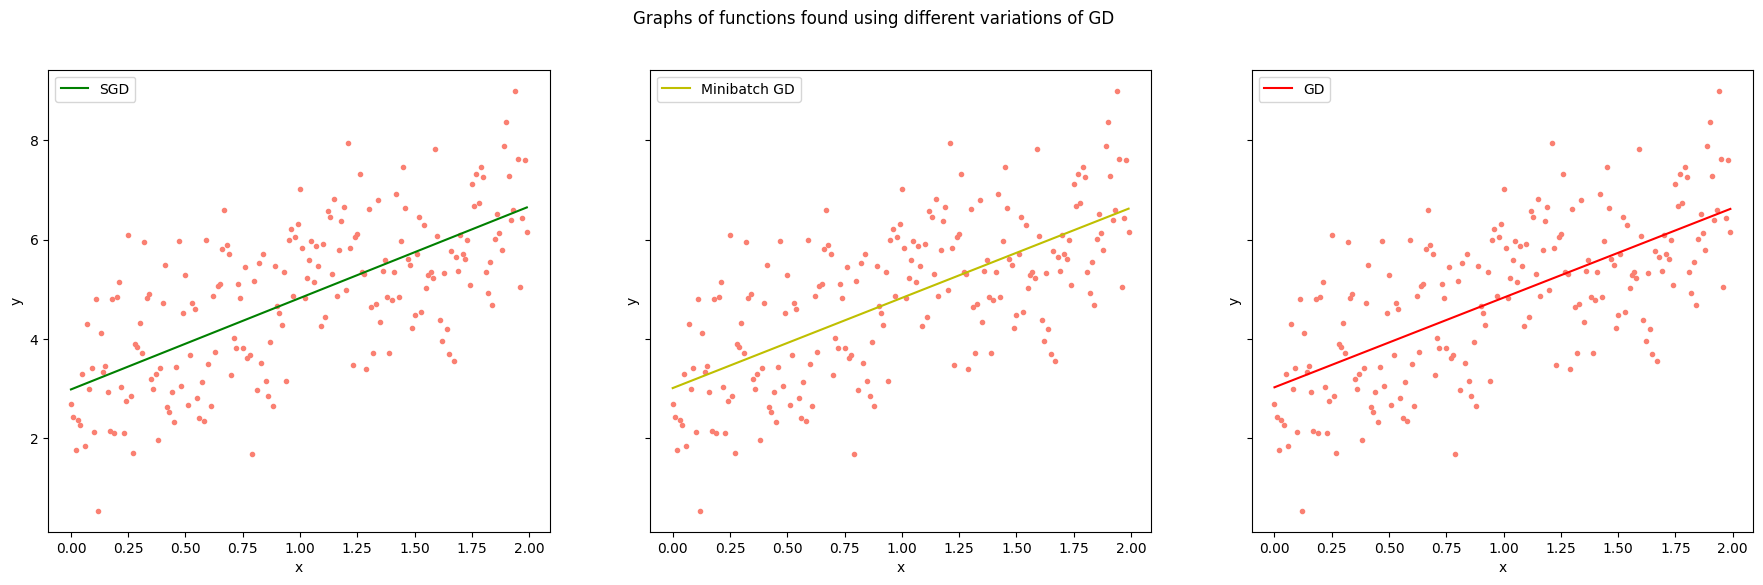

<ipython-input-225-d78ab0a4fe21>:25: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


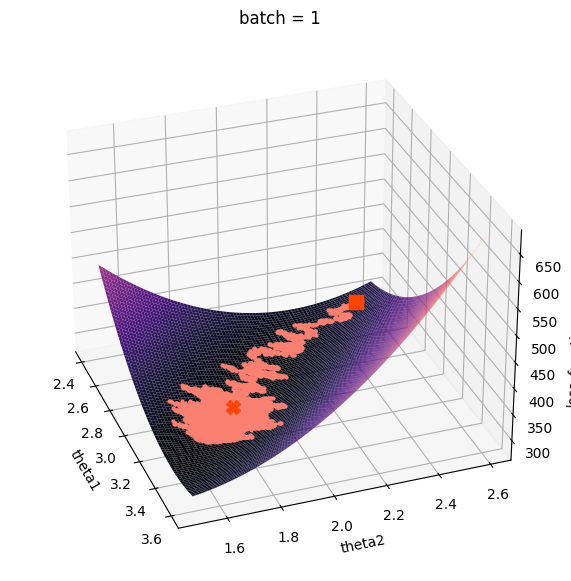

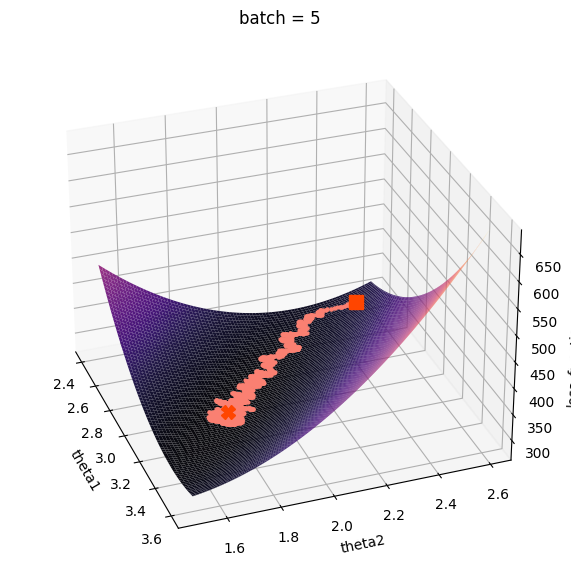

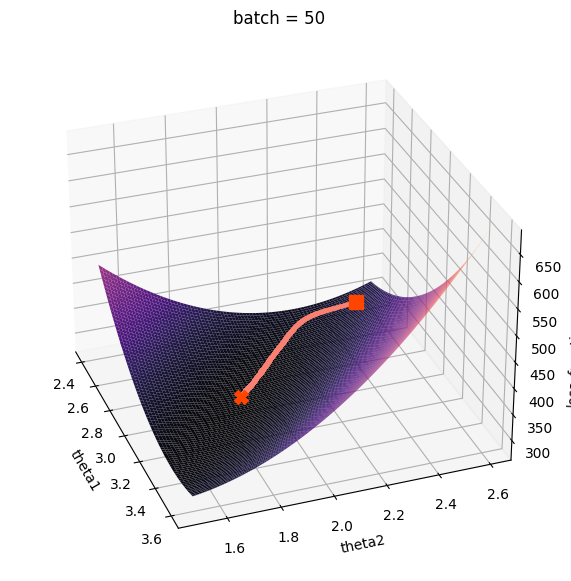

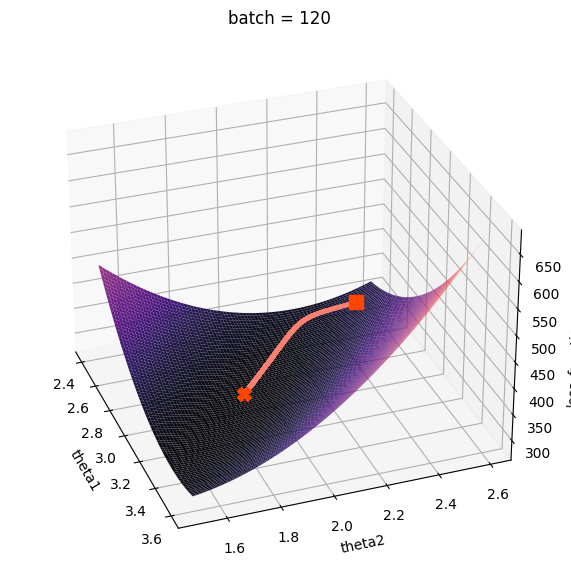

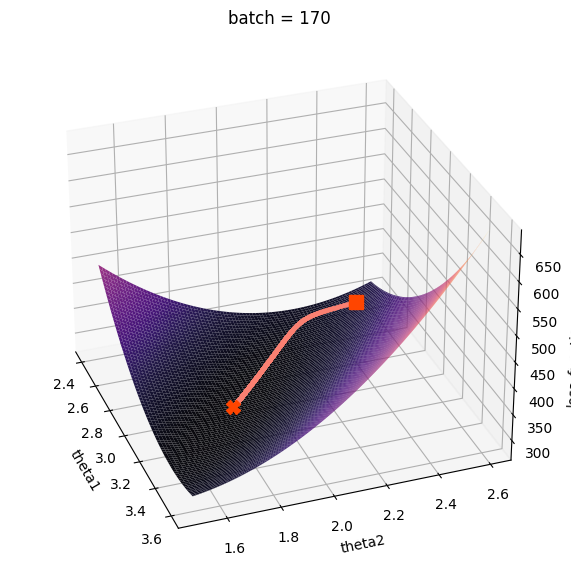

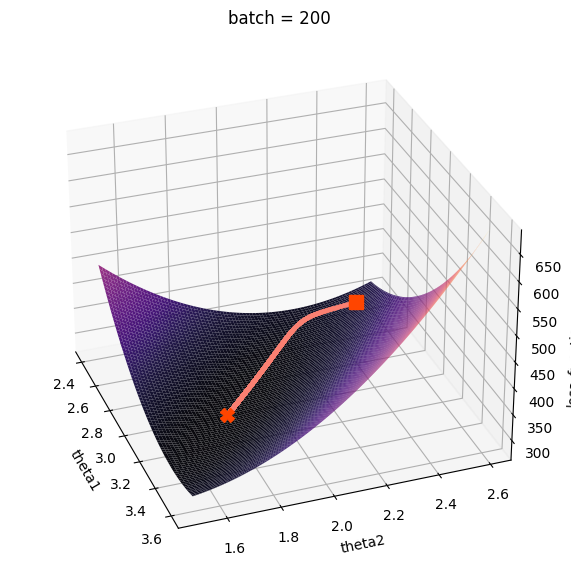

In [225]:
def draw_3d_function_theta(left_limit_x, right_Limit_x, left_limit_y, right_Limit_y, points, azim, dist, elev, orig_X, orig_Y, name=""):
    t1 = np.linspace(left_limit_x, right_Limit_x, 1000)
    t2 = np.linspace(left_limit_y, right_Limit_y, 1000)
    X, Y = np.meshgrid(t1, t2)
    Z = X.copy()
    for i in range(len(X)):
        for j in range(len(X[i])):
            Z[i][j] = loss_function(orig_X, orig_Y, np.array([X[i][j], Y[i][j]]))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap = 'magma',
                    alpha=0.97, rstride=12, cstride=12, zorder=1) # draw function surface
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    Z = [loss_function(orig_X, orig_Y, np.array([p[0], p[1]])) for p in points]
    ax.plot(X, Y, Z,'.', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    ax.plot(X, Y, Z, linewidth=0.5, color='salmon', zorder=4, label=name) # draw lines beetwen dots
    ax.plot(X[0], Y[0], Z[0], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    ax.plot(X[-1], Y[-1], Z[-1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    ax.set_title(name)
    ax.set_xlabel('theta1')
    ax.set_ylabel('theta2')
    ax.set_zlabel('loss_function')
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    plt.show()

def func(x):
    return 2 * x + 3

def generate_sample(step=0.01, total=200):
    x = 0
    for i in range(total):
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(1, 3)
        x += step

TOTAL = 200
STEP = 0.01
INITIAL_THETA = [2.5, 2.5]
lr = 0.007
eps = 1e-5

X = np.arange(0, TOTAL * STEP, STEP, dtype=np.float64)
Y = np.array([y for y in generate_sample(STEP, TOTAL)], dtype=np.float64)

A = np.empty((TOTAL, 2), dtype=np.float64)
A[:, 0] = 1
A[:, 1] = X

theta_stochastic = stochastic_descent(A, Y, INITIAL_THETA, lr=lr, eps=eps)
theta_minibatch5 = minibatch_descent(A, Y, INITIAL_THETA, batch_size=5, lr=lr, eps=eps)
theta_minibatch50 = minibatch_descent(A, Y, INITIAL_THETA, batch_size=50, lr=lr, eps=eps)
theta_minibatch120 = minibatch_descent(A, Y, INITIAL_THETA, batch_size=120, lr=lr, eps=eps)
theta_minibatch170 = minibatch_descent(A, Y, INITIAL_THETA, batch_size=170, lr=lr, eps=eps)
theta_batch = batch_descent(A, Y, INITIAL_THETA, lr=lr, eps=eps)


def function(x, theta):
    return theta[0] + theta[1] * x

colors = ['g', 'y', 'r']
data = [theta_stochastic[-1], theta_minibatch5[-1], theta_batch[-1]]
labels = ['SGD', 'Minibatch GD', 'GD']

f,axs = plt.subplots(1, 3, figsize=(22, 6), sharex=True, sharey=True)
f.suptitle("Graphs of functions found using different variations of GD")
for i,ax in enumerate(axs):
  axs[i].plot(X, Y, 'o', color='salmon', markersize=3)
  axs[i].plot(X, [function(p, data[i]) for p in X], '-', color=colors[i], markersize=4, label=labels[i])
  axs[i].set_xlabel("x")
  axs[i].set_ylabel("y")
  axs[i].legend(loc="upper left")

plt.show()

draw_3d_function_theta(2.4, 3.6, 1.5, 2.6, theta_stochastic, -20, 10, 30, A, Y, name="batch = 1")
draw_3d_function_theta(2.4, 3.6, 1.5, 2.6, theta_minibatch5, -20, 10, 30, A, Y, name="batch = 5")
draw_3d_function_theta(2.4, 3.6, 1.5, 2.6, theta_minibatch50, -20, 10, 30, A, Y, name="batch = 50")
draw_3d_function_theta(2.4, 3.6, 1.5, 2.6, theta_minibatch120, -20, 10, 30, A, Y, name="batch = 120")
draw_3d_function_theta(2.4, 3.6, 1.5, 2.6, theta_minibatch170, -20, 10, 30, A, Y, name="batch = 170")
draw_3d_function_theta(2.4, 3.6, 1.5, 2.6, theta_batch, -20, 10, 30, A, Y, name="batch = 200")

# 2 пункт

## SGD with learning rate scheduling

In [158]:
def exp_lr(epoch, initial_lr):
  k = 0.00001
  learning_rate = initial_lr * exp(-k*epoch)
  return learning_rate


def stochastic_descent_with_lr_scheduling(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    epoch = 1
    while np.abs(previous_cost - current_cost) > eps:
        learning_rate = exp_lr(epoch, lr)
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        theta[0] += learning_rate * derivatives[0]
        theta[1] += learning_rate * derivatives[1]
        current_cost = loss_function(X, Y, theta)
        epoch += 1
    print(current_cost, epoch, "sgd_scheduling_cost", "epoch_count")
    return theta

## Testing

sgd_scheduling_cost:  281.04827604840244 epoch_count: 17953
sgd_cost: 281.06161185038866 epoch_count: 65408


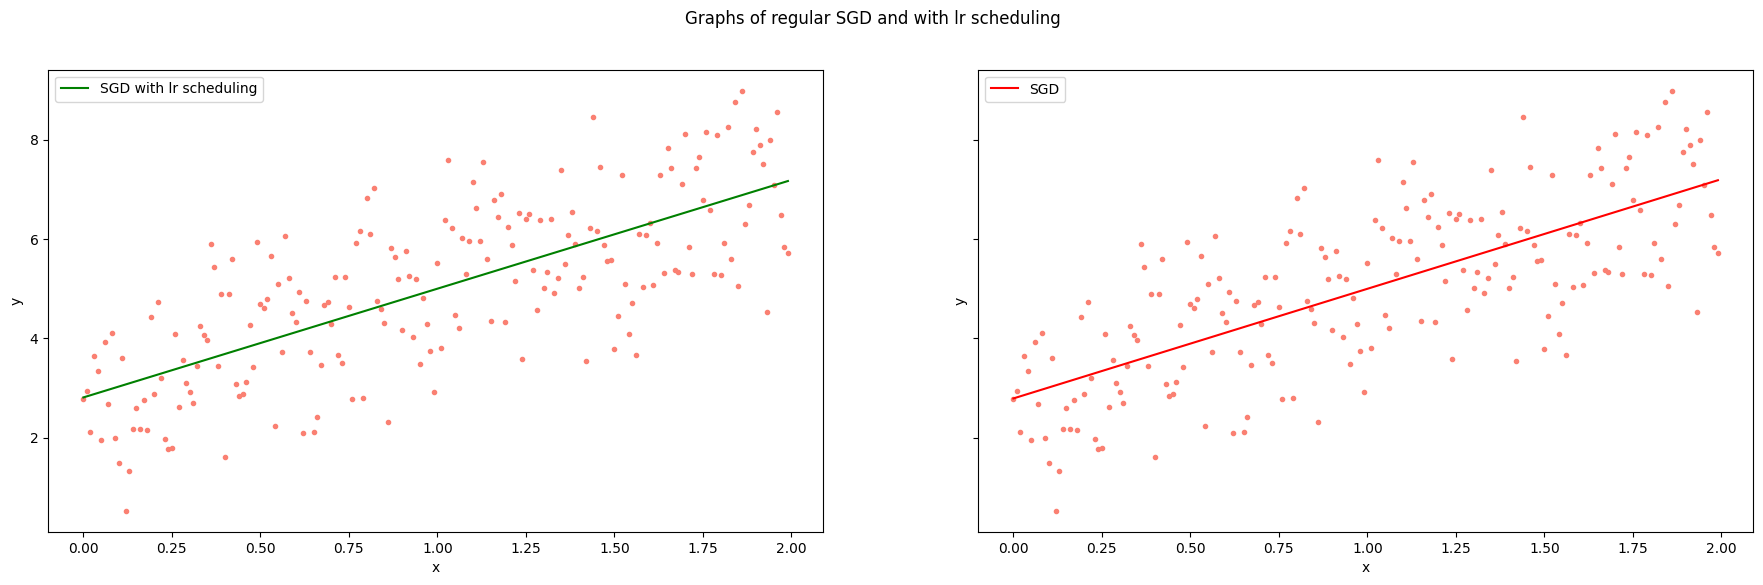

In [44]:
def func(x):
    return 2 * x + 3

def generate_sample(step=0.01, total=200):
    x = 0
    for i in range(total):
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(1, 3)
        x += step

TOTAL = 200
STEP = 0.01
INITIAL_THETA = [9, 14]
lr = 0.003
eps = 1e-6

X = np.arange(0, TOTAL * STEP, STEP, dtype=np.float64)
Y = np.array([y for y in generate_sample(STEP, TOTAL)], dtype=np.float64)

A = np.empty((TOTAL, 2), dtype=np.float64)
A[:, 0] = 1
A[:, 1] = X

theta_stochastic_with_lr_scheduling = stochastic_descent_with_lr_scheduling(A, Y, INITIAL_THETA, lr=lr, eps=eps)
theta_stochastic = stochastic_descent(A, Y, INITIAL_THETA, lr=lr, eps=eps)

def function(x, theta):
    return theta[0] + theta[1] * x

colors = ['g', 'r']
data = [theta_stochastic_with_lr_scheduling, theta_stochastic]
labels = ['SGD with lr scheduling', 'SGD']

f,axs = plt.subplots(1, 2, figsize=(22, 6), sharex=True, sharey=True)
f.suptitle("Graphs of regular SGD and with lr scheduling")
for i,ax in enumerate(axs):
  axs[i].plot(X, Y, 'o', color='salmon', markersize=3)
  axs[i].plot(X, [function(p, data[i]) for p in X], '-', color=colors[i], markersize=4, label=labels[i])
  axs[i].set_xlabel("x")
  axs[i].set_ylabel("y")
  axs[i].legend(loc="upper left")

plt.show()

# 3 пункт

## Utils

In [126]:
def check_points(point1, point2, eps=1e-6):
    for i in range(len(point1)):
      if abs(point1[i] - point2[i]) > eps:
        return True
    return False

def draw_3d_function(left_limit, right_Limit, points, azim, dist, elev, function, name=""):
    t = np.linspace(left_limit, right_Limit, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    my_col = cm.cool(function(X, Y)/np.amax(function(X, Y))) # color of surface
    ax.plot_surface(X, Y, function(X, Y), facecolors = my_col,
                    alpha=0.8, rstride=12, cstride=12, zorder=1) # draw function surface
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    Z = [function(p[0], p[1]) for p in points]
    ax.plot(X, Y, Z,'.', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    ax.plot(X, Y, Z, linewidth=0.5, color='salmon', zorder=4, label=name) # draw lines beetwen dots
    ax.plot(X[0], Y[0], Z[0], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    ax.plot(X[-1], Y[-1], Z[-1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    ax.set_title(name)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    plt.show()
  
def draw_lines_of_level(points, function, name=""):
    t = np.linspace(-7, 7, 100)
    X, Y = np.meshgrid(t, t)
    plt.plot([p[0] for p in points], [p[1] for p in points], 'o-', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    plt.plot([p[0] for p in points], [p[1] for p in points], linewidth=0.5, color='salmon', zorder=4, label=name) # draw lines beetwen dots
    plt.plot(points[0][0], points[0][1], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    plt.plot(points[-1][0], points[-1][1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    plt.contour(X, Y, function(X, Y), levels=np.unique(sorted([function(p[0], p[1]) for p in points])))
    plt.title(name)
    plt.show()

## GD with Momentum

In [129]:
def gradient_descent_with_momentum(x, grad_f, lr=0.1, alpha=0.9):
    theta = x.copy()
    points = [x]
    g = np.array([0, 0], dtype=np.float64)
    epoch = 1
    while True:
        g = alpha * g + (1 - alpha) * lr * np.array(grad_f(theta[0], theta[1]))
        theta = theta - g
        points.append(theta)
        if not check_points(points[-2], points[-1]):
          break
        epoch += 1
    print(theta, epoch, "momentum")
    return points

## GD with Nesterov

In [128]:
def gradient_descent_with_nesterov(x, grad_f, lr=0.1, alpha=0.9):
    theta = x.copy()
    points = [x]
    g = np.array([0, 0], dtype=np.float64)
    epoch = 1
    while True:
        theta -= alpha * g
        g = alpha * g + (1 - alpha) * lr * np.array(grad_f(theta[0], theta[1]))
        theta = theta - g
        points.append(theta)
        if not check_points(points[-2], points[-1]):
          break
        epoch += 1
    print(theta, epoch, "nesterov")
    return points

## GD with AdaGrad

In [130]:
def gradient_descent_with_adagrad(x, grad_f, lr=2):
    theta = x.copy()
    points = [x]
    g = np.array([0, 0], dtype=np.float64)
    epoch = 1
    while True:
        grad = np.array(grad_f(theta[0], theta[1]))
        g += grad ** 2
        theta = theta - lr / (g ** 0.5) * grad
        points.append(theta)
        if not check_points(points[-2], points[-1]):
            break
        epoch += 1
    print(theta, epoch, "adagrad")
    return points

## GD with RMSProp

In [131]:
def gradient_descent_with_rmsprop(x, grad_f, lr=2, gamma=0.9):
    theta = x.copy()
    points = [x]
    g = np.array([0, 0], dtype=np.float64)
    epoch = 1
    while True:
        grad = np.array(grad_f(theta[0], theta[1]))
        g = gamma * g + (1 - gamma) * grad ** 2
        theta = theta - lr / (g ** 0.5 + 1e-6) * grad
        points.append(theta)
        if len(points) > 2 and (points[-1] == points[-3]).all():
          break
        if not check_points(points[-2], points[-1]):
          break
        epoch += 1
    print(theta, epoch, "rmsprop")
    return points

## GD with Adam

In [132]:
def gradient_descent_with_adam(x, grad_f, lr=0.1, b1=0.9, b2=0.999):
    theta = x.copy()
    points = [x]
    m = np.array([0, 0], dtype=np.float64)
    v = np.array([0, 0], dtype=np.float64)
    epoch = 1
    while True:
        grad = np.array(grad_f(theta[0], theta[1]))
        m = b1 * m + (1 - b1) * grad
        v = b2 * v + (1 - b2) * grad ** 2
        mm = m / (1 - b1 ** epoch)
        vv = v / (1 - b2 ** epoch)
        theta = theta - lr / (vv ** 0.5) * mm
        points.append(theta)
        if not check_points(points[-2], points[-1]):
          break
        epoch += 1
    print(theta, epoch, "adam")
    return points


## Testing

[-2.80511786  3.1313125 ] 18 original
[3.00000785 1.99999412] 250 momentum
[2.99999744 1.99997819] 226 nesterov
[-2.80513337  3.13131278] 172 adagrad
[-2.85402563  3.07994021] 637 rmsprop
[2.99999821 2.00000577] 261 adam


<ipython-input-126-c2ce33ce6684>:27: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


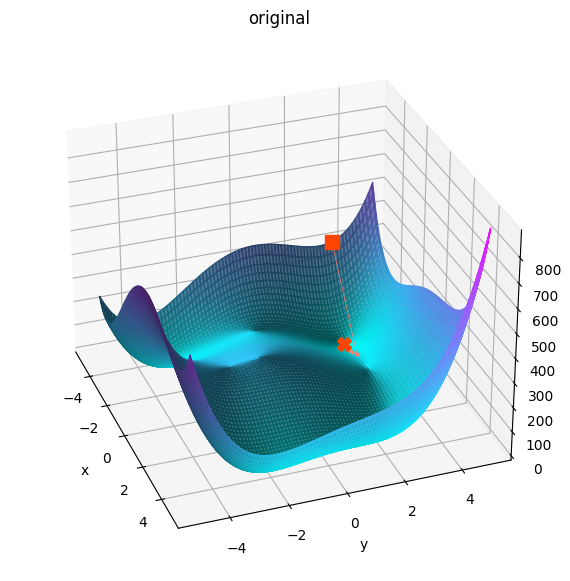

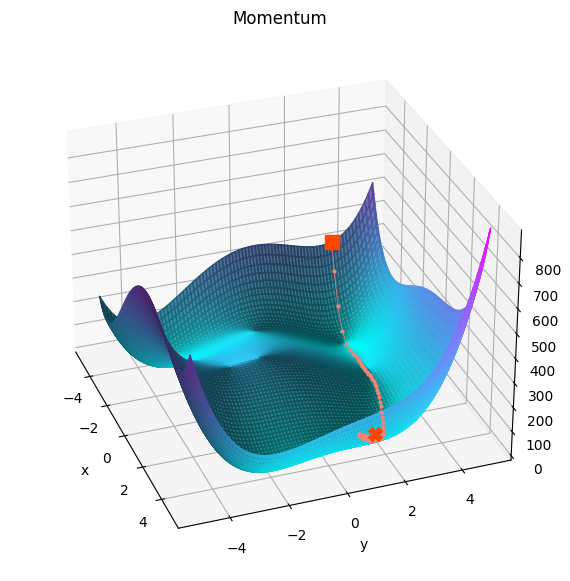

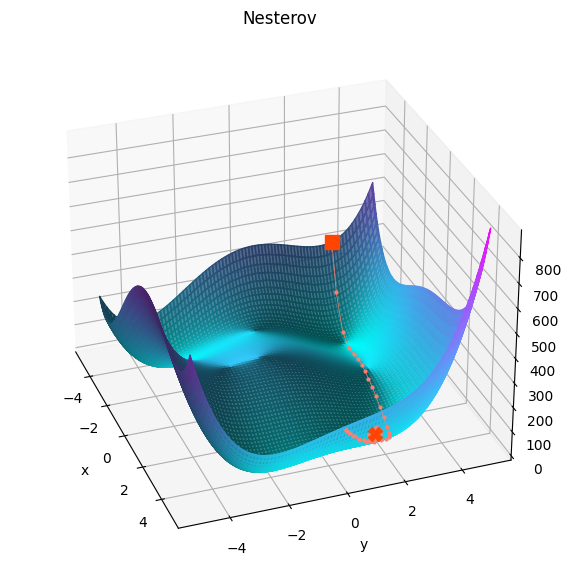

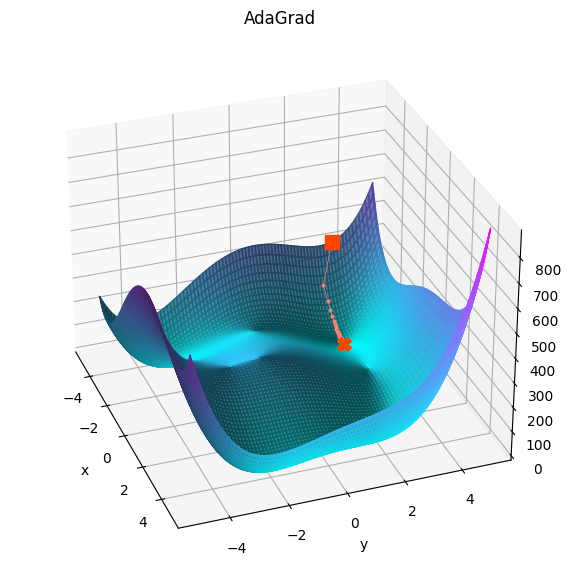

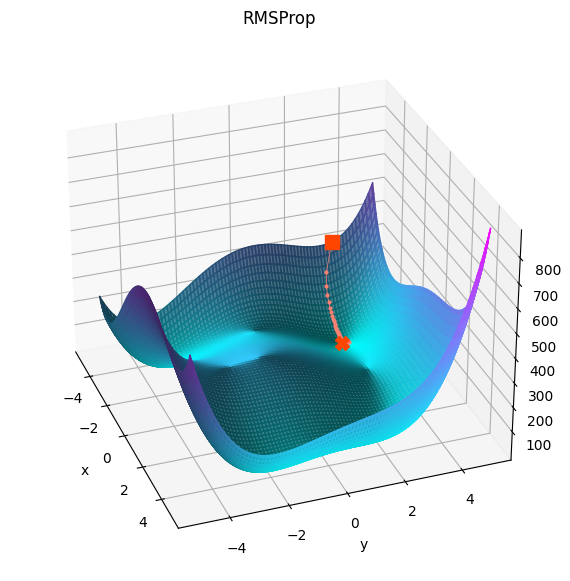

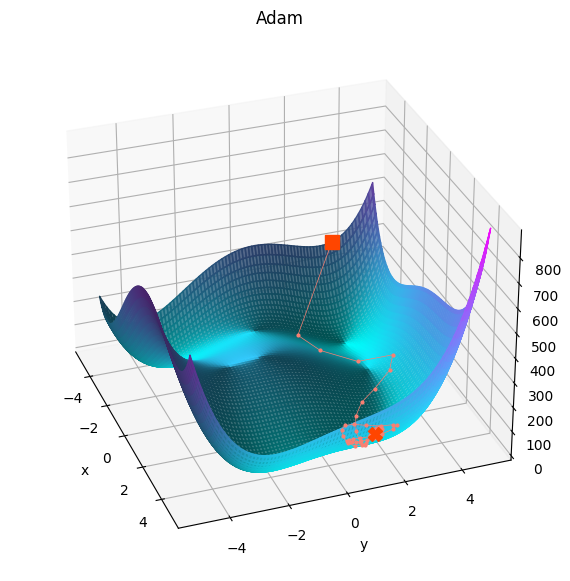

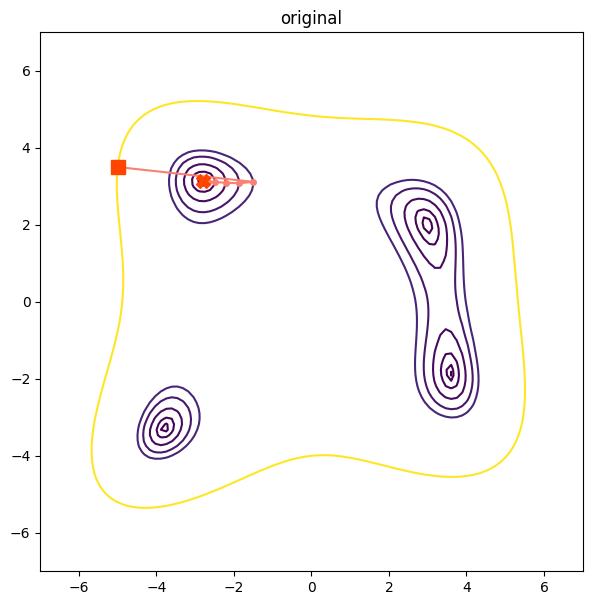

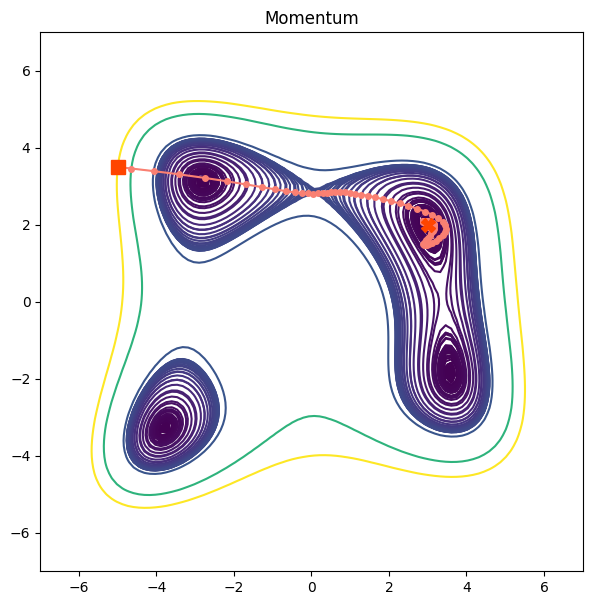

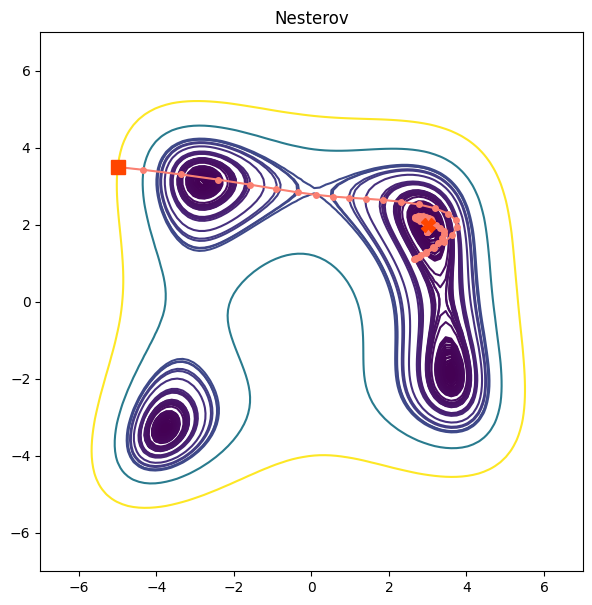

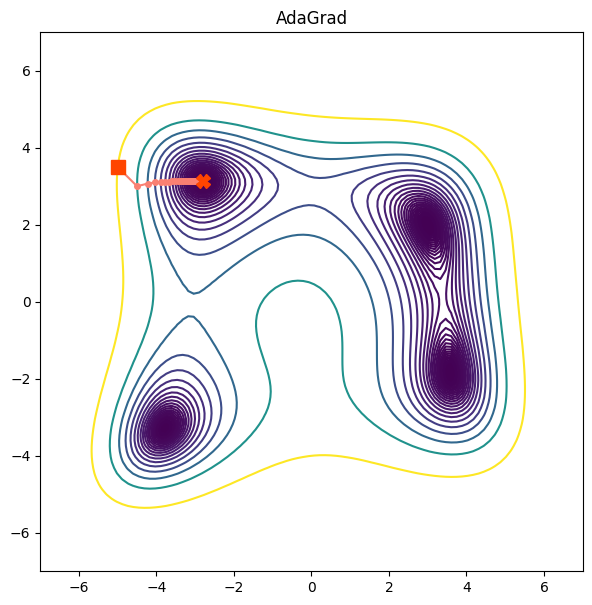

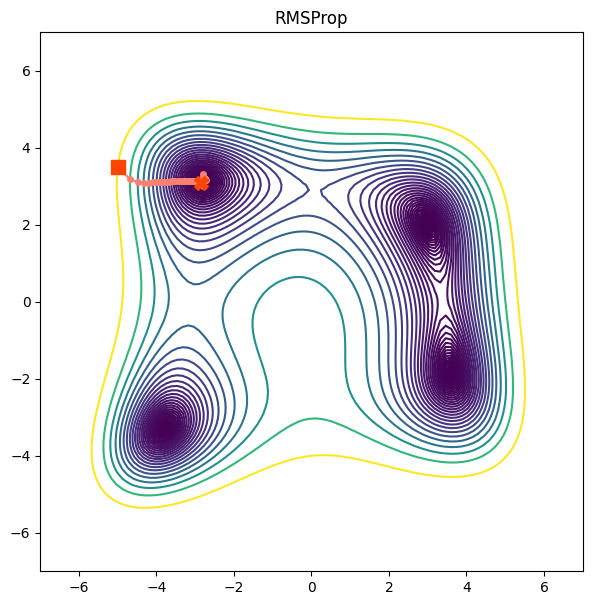

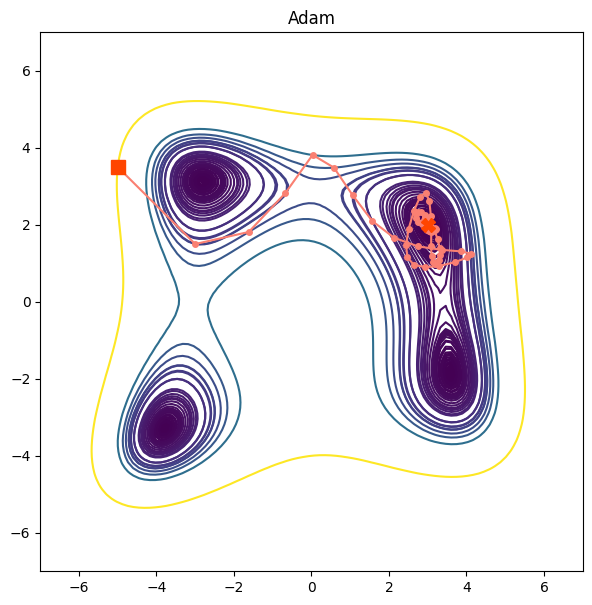

In [140]:
# def f(x, y):
#     return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
# def grad(x, y):
#     return [2 * (200 * x ** 3 - 200 * x * y + x - 1), -200 * (x ** 2 - y)]

def f(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
def grad(x, y):
    return [2 * (2 * x * (x ** 2 + y - 11) + x + y ** 2 - 7), 2 * (x ** 2 + 2 * y * (x + y ** 2 - 7) + y - 11)]

# def f(x, y):
#     return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2
# def grad(x, y):
#     return [10 * x + 8 * y - 34, 8 * x + 10 * y - 38]

def gradient_descent(x, grad_f, lr=0.1):
    theta = x.copy()
    points = [x]
    epoch = 1
    while True:
        theta = theta - lr * np.array(grad_f(theta[0], theta[1]))
        points.append(theta)
        if not check_points(points[-2], points[-1]):
          break
        epoch += 1
    print(theta, epoch, "original")
    return points

x = [-5, 3.5]
points_gd = gradient_descent(x, grad, lr=0.01)
points_with_momentum = gradient_descent_with_momentum(x, grad, lr=0.01)
points_with_nesterov = gradient_descent_with_nesterov(x, grad, lr=0.01)
points_with_adagrad = gradient_descent_with_adagrad(x, grad, lr=0.5)
points_with_rmsprop = gradient_descent_with_rmsprop(x, grad, lr=0.1)
points_with_adam = gradient_descent_with_adam(x, grad, lr=2)

plt.rcParams["figure.figsize"] = (7, 7)
draw_3d_function(-5, 5, points_gd, -20, 10, 30, f, name="original")
draw_3d_function(-5, 5, points_with_momentum, -20, 10, 30, f, name="Momentum")
draw_3d_function(-5, 5, points_with_nesterov, -20, 10, 30, f, name="Nesterov")
draw_3d_function(-5, 5, points_with_adagrad, -20, 10, 30, f, name="AdaGrad")
draw_3d_function(-5, 5, points_with_rmsprop, -20, 10, 30, f, name="RMSProp")
draw_3d_function(-5, 5, points_with_adam, -20, 10, 30, f, name="Adam")
draw_lines_of_level(points_gd, f, name="original")
draw_lines_of_level(points_with_momentum, f, name="Momentum")
draw_lines_of_level(points_with_nesterov, f, name="Nesterov")
draw_lines_of_level(points_with_adagrad, f, name="AdaGrad")
draw_lines_of_level(points_with_rmsprop, f, name="RMSProp")
draw_lines_of_level(points_with_adam, f, name="Adam")

## Maybe will be helpful

In [ ]:
def stochastic_descent_with_momentum(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.01):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_theta = np.array(coefficients.copy(), dtype=np.float64)
    delta_theta = np.zeros(2, dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        delta_theta[0] = abs(previous_theta[0] - theta[0])
        delta_theta[1] = abs(previous_theta[1] - theta[1])
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        previous_theta[0] = theta[0]
        previous_theta[1] = theta[1]
        theta[0] += (lr * derivatives[0] + alpha * delta_theta[0])
        theta[1] += (lr * derivatives[1] + alpha * delta_theta[1])
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_nesterov(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.01):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_theta = np.array(coefficients.copy(), dtype=np.float64)
    delta_theta = np.zeros(2, dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        delta_theta[0] = abs(previous_theta[0] - theta[0])
        delta_theta[1] = abs(previous_theta[1] - theta[1])
        theta[0] += alpha * delta_theta[0]
        theta[1] += alpha * delta_theta[0]
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        previous_theta[0] = theta[0]
        previous_theta[1] = theta[1]
        theta[0] += lr * derivatives[0]
        theta[1] += lr * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_adagrad(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    # previous_gradients = []
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = [0, 0]
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        g[0] += derivatives[0] ** 2
        g[1] += derivatives[1] ** 2
        # previous_gradients.append(derivatives)
        # g = [0, 0]
        # for i in range(len(g)):
        #   for j in range(len(previous_gradients)):
        #     g[i] += previous_gradients[j][i] ** 2
        theta[0] += lr / g[0] ** 0.5 * derivatives[0]
        theta[1] += lr / g[1] ** 0.5 * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_rmsprop(X, Y, coefficients, lr=0.1, eps=1e-4, gamma=0.9):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = [0, 0]
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        g[0] = gamma * g[0] + (1 - gamma) * derivatives[0] ** 2
        g[1] = gamma * g[1] + (1 - gamma) * derivatives[1] ** 2
        theta[0] += lr / g[0] ** 0.5 * derivatives[0]
        theta[1] += lr / g[1] ** 0.5 * derivatives[1]
        current_cost = loss_function(X, Y, theta)
    return theta

def stochastic_descent_with_adam(X, Y, coefficients, lr=0.1, eps=1e-4, b1=0.9, b2=0.999):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    m = [0, 0]
    v = [0, 0]
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - X[i]@theta) * X[i][j]
        if m[0] == 0 and m[1] == 0:
          m[0] = derivatives[0]
          m[1] = derivatives[1]
          # m[0] = m[0] / (1 - b1)
          # m[1] = m[1] / (1 - b1)
          v[0] = derivatives[0] ** 2
          v[1] = derivatives[1] ** 2
          # v[0] = v[0] / (1 - b2)
          # v[1] = v[1] / (1 - b2)
        m[0] = b1 * m[0] + (1 - b1) * derivatives[0]
        m[1] = b1 * m[1] + (1 - b1) * derivatives[1]
        # m[0] = m[0] / (1 - b1)
        # m[1] = m[1] / (1 - b1)
        v[0] = b2 * v[0] + (1 - b2) * derivatives[0] ** 2
        v[1] = b2 * v[1] + (1 - b2) * derivatives[1] ** 2
        # v[0] = v[0] / (1 - b2)
        # v[1] = v[1] / (1 - b2)
        # print(derivatives[0], m[0], v[0])
        theta[0] += lr / (v[0] ** 0.5) * m[0]
        theta[1] += lr / (v[1] ** 0.5) * m[1]
        current_cost = loss_function(X, Y, theta)
        print(current_cost, theta)
    return theta


def func(x):
    return 2 * x + 3

def generate_sample(step=0.1, total=400):
    x = 0
    for i in range(total):
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(1, 8)
        x += step

TOTAL = 200
STEP = 0.01
INITIAL_THETA = [20, 20]

X = np.arange(0, TOTAL * STEP, STEP, dtype=np.float64)
Y = np.array([y for y in generate_sample(STEP, TOTAL)], dtype=np.float64)

A = np.empty((TOTAL, 2), dtype=np.float64)
A[:, 0] = 1
A[:, 1] = X

theta_stochastic_with_nesterov = stochastic_descent_with_nesterov(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)
theta_stochastic_with_momentum = stochastic_descent_with_momentum(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)
theta_stochastic_with_adagrad = stochastic_descent_with_adagrad(A, Y, INITIAL_THETA, lr=0.3, eps=1e-6)
theta_stochastic_with_rmsprop = stochastic_descent_with_rmsprop(A, Y, INITIAL_THETA, lr=0.03, eps=1e-6)
theta_stochastic_with_adam = stochastic_descent_with_adam(A, Y, INITIAL_THETA, lr=0.01, eps=1e-6)
theta_stochastic = stochastic_descent(A, Y, INITIAL_THETA, lr=0.001, eps=1e-6)

def function(x, theta):
    return theta[0] + theta[1] * x

colors = ['red', 'black', 'lime', 'lawngreen', 'fuchsia', 'aqua']
data = [theta_stochastic, theta_stochastic_with_nesterov, theta_stochastic_with_momentum, theta_stochastic_with_adagrad, theta_stochastic_with_rmsprop, theta_stochastic_with_adam]
labels = ['SGD', 'SGD with nesterov', 'SGD with momentum', 'SGD with adagrad', 'SGD with RMSProp', 'SGD with adam']

f,axs = plt.subplots(2, 3, figsize=(20, 10), sharex=True, sharey=True)
f.suptitle("Graphs of regular SGD and with momentum")
for i,ax in enumerate(axs):
  for j in range(3):
    axs[i][j].plot(X, Y, 'o', color='salmon', markersize=3)
    axs[i][j].plot(X, [function(p, data[i * 3 + j]) for p in X], '-', color=colors[i * 3 + j], markersize=4, label=labels[i * 3 + j])
    axs[i][j].plot(X, [func(p) for p in X], '-', color='b', zorder=4, markersize=4, label='original')
    axs[i][j].set_xlabel("x")
    axs[i][j].set_ylabel("y")
    axs[i][j].legend(loc="upper left")

plt.show()

KeyboardInterrupt: ignored

# Доп

## Polynomial regression

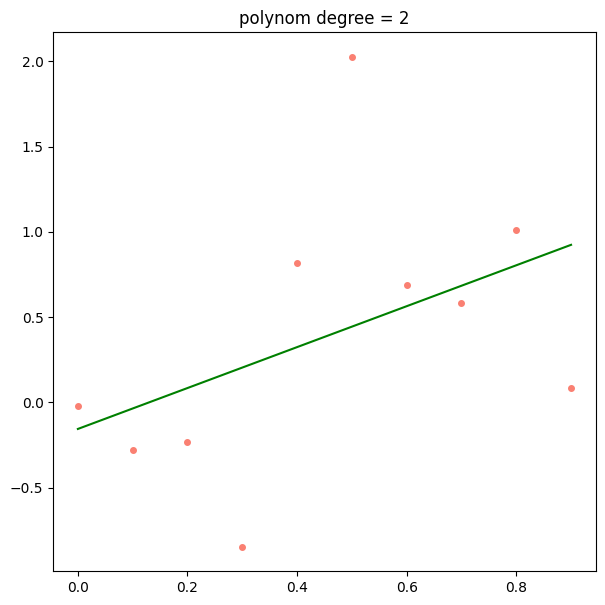

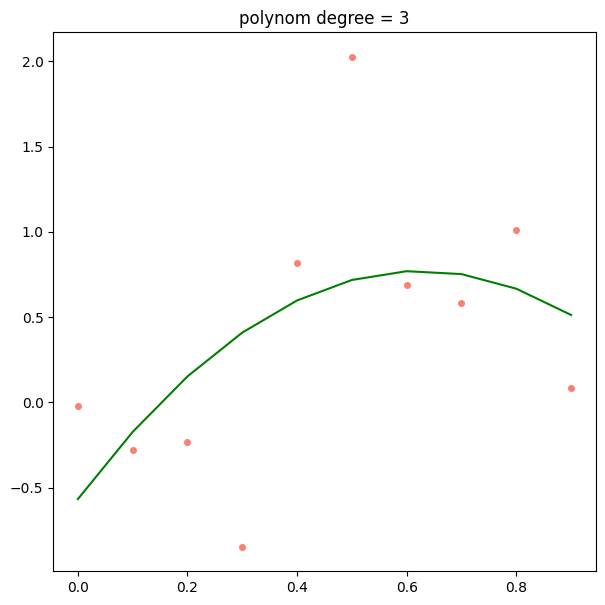

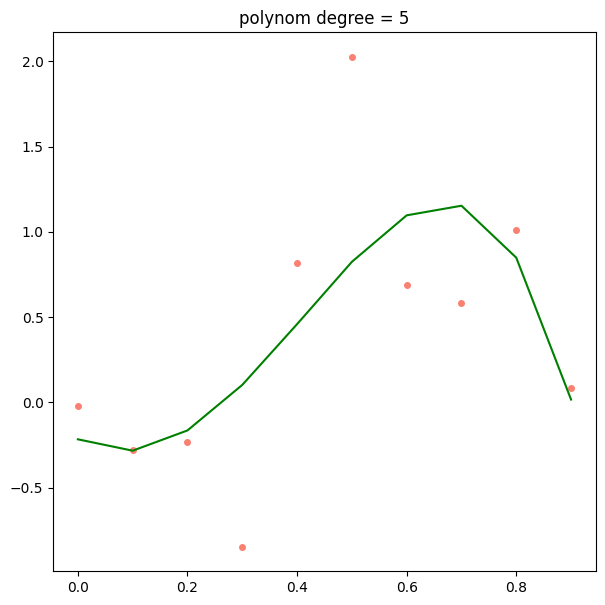

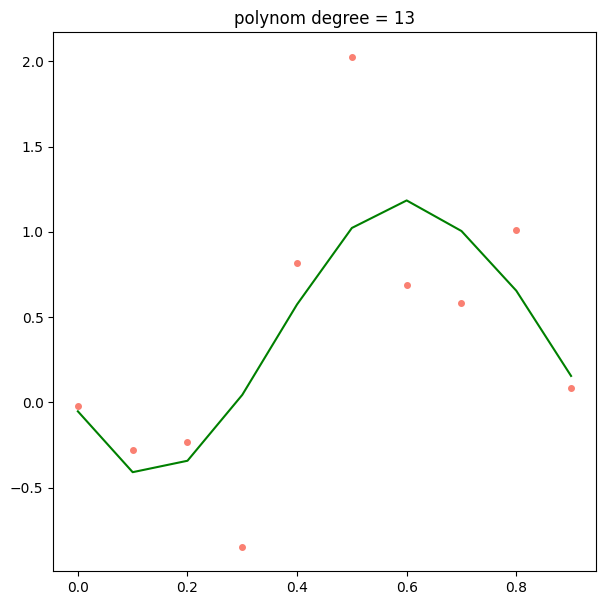

In [363]:
def stochastic_descent_with_adagrad(X, Y, coefficients, lr=0.1, eps=1e-4):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = np.zeros(len(theta), dtype=np.float64)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(len(Y)):
                summ += (Y[i] - X[i]@theta) * X[i][j]
            derivatives[j] = summ
        for j in range(len(theta)):
          g[j] += derivatives[j] ** 2
          theta[j] += lr / g[j] ** 0.5 * derivatives[j]
        current_cost = loss_function(X, Y, theta)
        # print(current_cost)
    return theta


TOTAL = 10
STEP = 0.1
FROM = 0
INITIAL_THETA = [[1, 1], [1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
lr = 1
eps = 1e-5

result = [0] * len(INITIAL_THETA)

def function(x, theta):
    result = 0
    for i in range(len(theta)):
      result += theta[i] * x ** i
    return result

for i in range(len(INITIAL_THETA)):
  X = np.arange(FROM, TOTAL * STEP + FROM, STEP, dtype=np.float64)
  Y = np.array([-0.02303106, -0.27686492, -0.22946492, -0.8456339, 0.81891949, 2.02615791, 0.68671234, 0.58596677, 1.01167922, 0.08661992], dtype=np.float64)

  A = np.empty((TOTAL, len(INITIAL_THETA[i])), dtype=np.float64)
  for j in range(len(INITIAL_THETA[i])):
    A[:, j] = [x ** j for x in X]

  result[i] = stochastic_descent_with_adagrad(A, Y, INITIAL_THETA[i], lr=lr, eps=eps)

  plt.plot(X, Y, 'o', color='salmon', zorder=4, markersize=4)
  plt.plot(X, [function(p, result[i]) for p in X], '-', color='g', zorder=4, markersize=4)
  plt.title(f'polynom degree = {len(INITIAL_THETA[i])}')
  plt.show()

## L1 regularization

In [313]:
def stochastic_descent_with_adagrad_l1(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.005):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = np.zeros(len(theta), dtype=np.float64)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(len(Y)):
                summ += (Y[i] - X[i]@theta) * X[i][j]
            derivatives[j] = summ
        for j in range(len(theta)):
          g[j] += derivatives[j] ** 2
          theta[j] += lr / g[j] ** 0.5 * derivatives[j] + alpha * abs(theta[j])
        current_cost = loss_function(X, Y, theta)
    return theta



## L2 regularization

In [329]:
def stochastic_descent_with_adagrad_l2(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.0001):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = np.zeros(len(theta), dtype=np.float64)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        # print(current_cost)
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(len(Y)):
                summ += (Y[i] - X[i]@theta) * X[i][j]
            derivatives[j] = summ
        for j in range(len(theta)):
          g[j] += derivatives[j] ** 2
          theta[j] += lr / g[j] ** 0.5 * derivatives[j] + alpha * theta[j] ** 2
        current_cost = loss_function(X, Y, theta)
    return theta

## Elastic regularization

In [318]:
def stochastic_descent_with_adagrad_elastic(X, Y, coefficients, lr=0.1, eps=1e-4, alpha=0.0001, gamma=0.5):
    theta = np.array(coefficients.copy(), dtype=np.float64)
    previous_cost = 10 ** 6
    current_cost = loss_function(X, Y, theta)
    g = np.zeros(len(theta), dtype=np.float64)
    while np.abs(previous_cost - current_cost) > eps:
        previous_cost = current_cost
        # print(current_cost)
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            summ = 0
            for i in range(len(Y)):
                summ += (Y[i] - X[i]@theta) * X[i][j]
            derivatives[j] = summ
        for j in range(len(theta)):
          g[j] += derivatives[j] ** 2
          theta[j] += lr / g[j] ** 0.5 * derivatives[j] + alpha * (gamma * theta[j] + (1 - gamma) / 2 * theta[j] ** 2)
        current_cost = loss_function(X, Y, theta)
    return theta

## Testing

[ -0.05175434  -5.87012108  23.497964    -2.66047238 -18.29796614
 -15.52837556  -3.64845844   8.31342616  15.14636847  14.99983456
   8.01588303  -4.70781836 -21.65131344]
[-0.26471411 -2.42105048 12.3984462  -3.30489133 -3.21207662 -2.82039788
 -2.28072945 -1.70852883 -1.17561943 -0.71739718 -0.34437835  0.81104197
  4.71699798]
[-0.4919734   2.01415307  1.47045179 -0.00992783 -0.59248242 -0.77749917
 -0.78813381 -0.72246203 -0.62914269 -0.53331482 -0.4473263  -0.37620416
 -0.32086352]
[-0.5042142   0.10995209  7.69049449 -1.92000224 -2.69282098 -2.63076696
 -2.24983906 -1.67901058 -0.96947985 -0.15309622  0.73224051  1.62882688
  2.45923754]


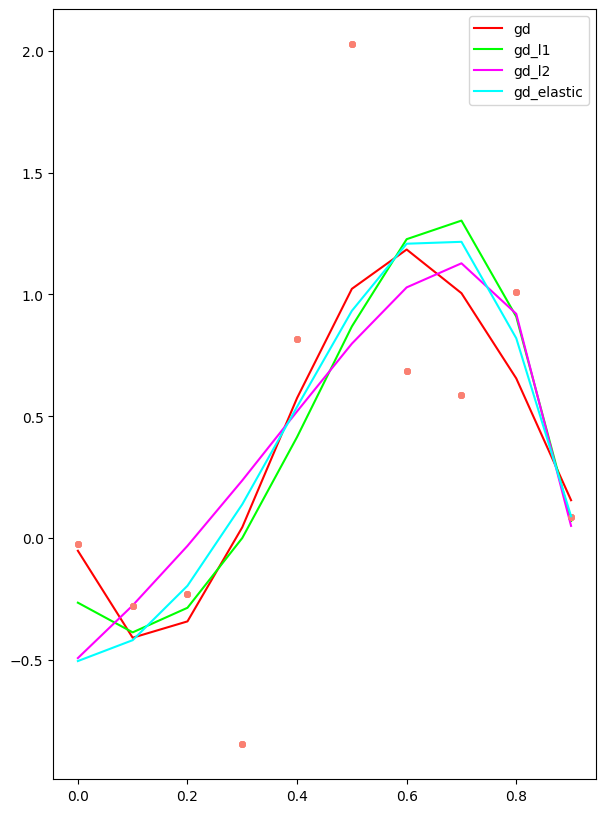

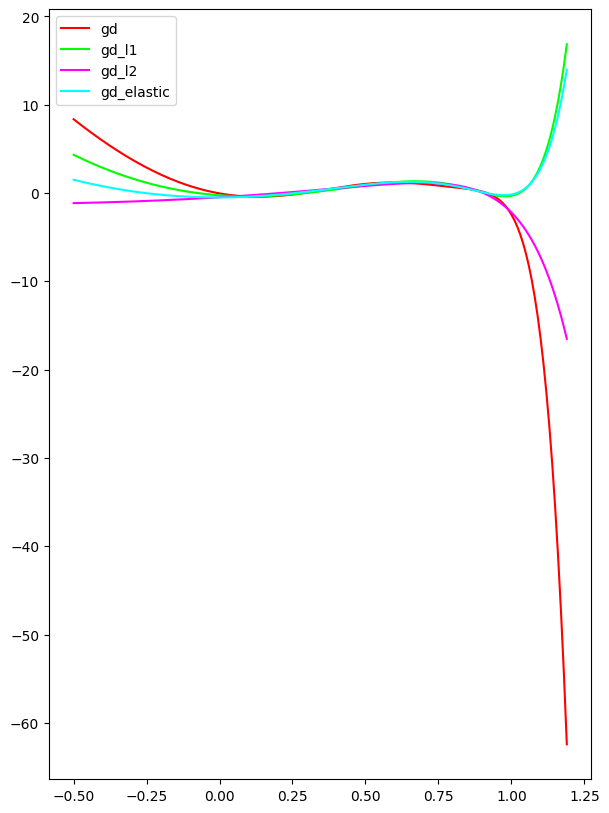

In [356]:
TOTAL = 10
STEP = 0.1
FROM = 0
INITIAL_THETA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
lr = 1
eps = 1e-5
alpha = 0.003

def function(x, theta):
    result = 0
    for i in range(len(theta)):
      result += theta[i] * x ** i
    return result

X = np.arange(FROM, TOTAL * STEP + FROM, STEP, dtype=np.float64)
Y = np.array([-0.02303106, -0.27686492, -0.22946492, -0.8456339, 0.81891949, 2.02615791, 0.68671234, 0.58596677, 1.01167922, 0.08661992], dtype=np.float64)

A = np.empty((TOTAL, len(INITIAL_THETA)), dtype=np.float64)
for j in range(len(INITIAL_THETA)):
  A[:, j] = [x ** j for x in X]

sgd = stochastic_descent_with_adagrad(A, Y, INITIAL_THETA, lr=lr, eps=eps)
sgd_l1 = stochastic_descent_with_adagrad_l1(A, Y, INITIAL_THETA, lr=lr, eps=eps, alpha=alpha)
sgd_l2 = stochastic_descent_with_adagrad_l2(A, Y, INITIAL_THETA, lr=lr, eps=eps, alpha=alpha)
sgd_elastic = stochastic_descent_with_adagrad_elastic(A, Y, INITIAL_THETA, lr=lr, eps=eps, alpha=alpha)

data = [sgd, sgd_l1, sgd_l2, sgd_elastic]
colors = ['red', 'lime', 'fuchsia', 'aqua']
labels = ['gd', 'gd_l1', 'gd_l2', 'gd_elastic']

fig, ax = plt.subplots()
for i in range(len(data)):
  ax.plot(X, Y, 'o', color='salmon', zorder=4, markersize=4)
  ax.plot(X, [function(p, data[i]) for p in X], '-', color=colors[i], zorder=4, markersize=4, label=labels[i])
  print(data[i])
ax.legend()
fig.set_figheight(10)
fig.set_figwidth(7)
plt.show()

fig, ax = plt.subplots()
X = np.arange(-0.5, 1.2, 0.01, dtype=np.float64)
for i in range(len(data)):
  ax.plot(X, [function(p, data[i]) for p in X], '-', color=colors[i], zorder=4, markersize=4, label=labels[i])
ax.legend()
fig.set_figheight(10)
fig.set_figwidth(7)
plt.show()